In [82]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [83]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data.data_loader import generateGauss, generateUniform
from utils.integral import grid

In [84]:
# bandwidth = 0.05
# grid_x    = grid(bandwidth, start=-20, end=30)

# IR = 50
# n1, n2 = 10, int(IR * 10)
# mu1 = np.random.normal(-5, np.sqrt(0.1), n1)
# mu1_plus = np.random.normal(5, np.sqrt(0.1), n1)

# mu2 = np.random.normal(5, np.sqrt(1.), n2)
# sig1 = np.ones_like(mu1)*3
# sig2 = np.ones_like(mu2)*3

# G1 = (1)*generateGauss(mu1, sig1, grid_x) # + 0*generateGauss(mu1_plus, sig1, grid_x)
# G2 = generateGauss(mu2, sig2, grid_x)
# G_data = np.vstack([G1, G2])

# # Save F_data to an .npz file
# np.savez("../dataset/G_data.npz", G_data=G_data, grid_x=grid_x, bandwidth=bandwidth)

In [85]:
bandwidth = 0.05
grid_x = grid(bandwidth, start=-20, end=20)

IR_value = [1,5,10,20,30,40,50,60,70, 80,90 ,10]               # tỉ lệ số mẫu lớn/nhỏ
n_small = 10         # số mẫu cụm nhỏ
mu_big_center   = 3  # mean cụm lớn
mu_small_center = -mu_big_center # mean cụm nhỏ
sig_big   = 1        # std cụm lớn
sig_small = 1.5      # std cụm nhỏ
seed = 42            # random seed


for IR in IR_value:
	rng = np.random.default_rng(seed)
	n_big = IR * n_small

	# means của cụm lớn & nhỏ
	mu_big   = rng.normal(mu_big_center,   0.4, n_big)
	mu_small = rng.normal(mu_small_center, 0.4, n_small)

	# sigma
	sig_big_arr   = np.full(n_big,   sig_big)
	sig_small_arr = np.full(n_small, sig_small)

	# sinh PDF Gaussian
	G1 = generateGauss(mu_big,   sig_big_arr,   grid_x)
	G2 = generateGauss(mu_small, sig_small_arr, grid_x)

	G_data = np.vstack([G1, G2])
	labels = np.array([0]*n_big + [1]*n_small)

	np.savez(f"../dataset/G_{mu_big_center}_data_{IR}.npz", G_data=G_data, grid_x=grid_x, bandwidth=bandwidth, labels=labels)



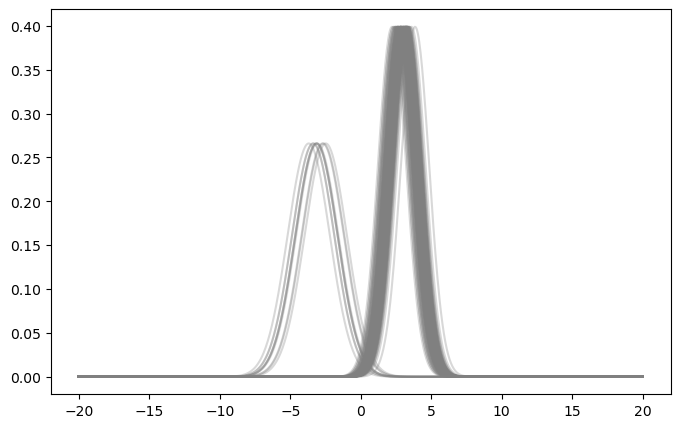

In [86]:
plt.figure(figsize=(8, 5))
for i in range(G_data.shape[0]):
	 plt.plot(grid_x, G_data[i], color='gray', alpha=0.3)